<div style="
  background-color: #2c3e50;
  color: white;
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style="margin-top: 0;">Libraries</h3>
  <blockquote style="
    border-left: 5px solid #4f6ef7;
    padding-left: 15px;
    margin: 15px 0;
    font-size: 1.1em;
    font-weight: 500;
  ">
    I will import libraries that may use it later <strong></strong>.
  </blockquote>
  <p style="font-style: italic;">
    Pandas, Numpy, Seaborn ....
  </p>
</div>

# Importing the libraries that I am gonge to use it .

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Read the dataset and store it into dataframe.



In [ ]:
# To read dataset and store it in Dataframe
Full_df=pd.read_csv('../../data/raw/wwlLancMsc_data.csv', low_memory=False)

# Check the number of features and records.

In [99]:
# to check how many coulmns and rows
Full_df.shape

(41846, 101)

In [ ]:
#to get information dataframe
print(Full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Columns: 101 entries, site_national_code to Deprivation Decile
dtypes: float64(8), int64(48), object(45)
memory usage: 32.2+ MB
None


_____________________________

_________________________________________________________________


# To check null values.

In [101]:
Df=pd.DataFrame([(field, Full_df[field].isna().sum()) for field in Full_df.columns])
Df.sort_values(by=1, ascending=False) # relieveant columns will agnore

,0,1
20,discharge_delay_reason_national_code,41846
33,social_worker_date_time_referred,41846
57,covid19_diagnosis_flag,41695
58,covid19_diagnosis_description,41695
14,date_of_death_dt,40315
...,...,...
73,comorbidity_peripheral_vascular_disease_flag,0
70,comorbidity_metastatic_cancer_flag,0
71,comorbidity_paraplegia_flag,0
99,ID,0


________
#This line shows the first five rows.

# Fill in some of the missing values with '**Unknown**.'

In [103]:
Full_df.fillna({'general_medical_practice_desc':'Unknown','discharge_letter_status' : 'Unknown', 'covid19_diagnosis_flag':'0'},inplace=True) # dealing with null values
Full_df[['general_medical_practice_desc','discharge_letter_status','covid19_diagnosis_flag']].isna().sum()

,0
general_medical_practice_desc,0
discharge_letter_status,0
covid19_diagnosis_flag,0


# To make sure that null values are replaced by **unknown**.

In [104]:

Full_df[['discharge_letter_status','general_medical_practice_desc','covid19_diagnosis_flag']].isin({'Unknown','0'}).sum()

,0
discharge_letter_status,17119
general_medical_practice_desc,156
covid19_diagnosis_flag,41695


In [105]:
binary_columns = Full_df.columns[((Full_df == 1) | (Full_df == 0)).all(axis=0)] #
df_bi=pd.DataFrame({i : Full_df[i].value_counts() for i in  binary_columns})
df_bi


,delayed_discharges_flag,readmission_flag_28_days,readmission_flag_30_days,inpatient_death_flag,elective_admission_flag,non_elective_admission_flag,emergency_readmission_non_pbr_30,readmission_flag_28_days_emergancy,readmission_flag_30_days_emergancy,IP_admission,...,comorbidity_peripheral_vascular_disease_flag,comorbidity_pulmonary_disease_flag,comorbidity_renal_disease_flag,comorbidity_severe_liver_disease_flag,chronic_condition_asthma_flag,chronic_condition_diabetes_flag,chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag,chronic_condition_obesity_flag,chronic_condition_respiratory_flag
0,41844,33770,33533,41322,38813,22258,38010,37595,37497,19203,...,40923,35024,39416,41631,37953,36242,24547,29559,36450,37175
1,2,8076,8313,524,3033,19588,3836,4251,4349,22643,...,923,6822,2430,215,3893,5604,17299,12287,5396,4671


# **_______________________________________________________________________**






# It is clear that there are huge null values in these columns **covid19_diagnosis_description** and **medically_optimised**. These features have a significant impact on accuracy and confidence

In [106]:

Full_df.drop(['medically_optimised','covid19_diagnosis_description'], axis=1,inplace=True)
Full_df.head()

,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,source_of_ref_description,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile
0,RRF01,LEIGH INFIRMARY,LEI,2023-07-15,15/07/2023 13:57:00,15/07/2023 16:00:00,CREC,104,Colorectal Surgery,GAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49591,3
1,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-07-05,05/07/2023 08:37:00,05/07/2023 10:08:00,TO,110,Trauma & Orthopaedics,OAU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25760,10
2,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 11:45:00,08/06/2023 12:50:00,GS,100,General Surgery,SAEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159753,3
3,RRF53,WRIGHTINGTON HOSPITAL,WNT,2023-06-08,08/06/2023 07:13:00,08/06/2023 17:35:00,BS,103,Breast Surgery,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76679,4
4,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,2023-06-08,08/06/2023 08:29:00,08/06/2023 15:34:00,GA,301,Gastroenterology,ENDO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617,9


# **__________________________________________________________________________**

# summary of numerical values

In [107]:
Full_df.describe()

,specialty_spec_code,duration_elective_wait,patient_age_on_admission,patient_age_on_discharge,spell_episode_los,discharge_delay_reason_national_code,delayed_discharges_flag,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,...,chronic_condition_diabetes_flag,chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag,chronic_condition_obesity_flag,chronic_condition_respiratory_flag,acuity_code,NEWS2,ae_unplanned_attendance,ID,Deprivation Decile
count,41846.000000,17295.000000,41846.000000,41846.000000,41846.000000,0.0,41846.000000,41846.000000,41846.000000,41846.000000,...,41846.00000,41846.000000,41846.000000,41846.000000,41846.000000,11017.000000,9750.000000,11464.0,41846.000000,41846.000000
mean,244.584668,105.389303,56.907470,56.912274,1.759427,NaN,0.000048,0.000406,0.192993,0.198657,...,0.13392,0.413397,0.293624,0.128949,0.111624,2.744849,1.818564,1.0,87398.334273,4.816781
std,118.221109,172.722877,23.284725,23.287412,5.281628,NaN,0.006913,0.069992,0.394653,0.398994,...,0.34057,0.492449,0.455427,0.335147,0.314907,0.623447,2.387784,0.0,50524.386801,2.993522
min,100.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,3.000000,1.000000
25%,110.000000,18.000000,41.000000,41.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.0,43528.750000,2.000000
50%,300.000000,49.000000,62.000000,62.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.0,86992.500000,4.000000
75%,301.000000,132.000000,75.000000,75.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.0,131240.250000,8.000000
max,560.000000,3415.000000,104.000000,104.000000,123.000000,NaN,1.000000,14.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,5.000000,17.000000,1.0,174728.000000,10.000000



________________________________________________________________________________

In [108]:
Full_df['discharge_letter_status'].unique()

array(['Unknown', 'Letter Sent', 'Awaiting Letter Send',
       'Awaiting Discharge Letter Completion',
       'Awaiting Discharge Checklist', 'Awaiting Pharmacy Verification',
       'Awaiting Medication Final Check',
       'Awaiting Medication Collection'], dtype=object)

In [109]:
Full_df['general_medical_practice_desc'].isna().sum()

np.int64(0)

In [110]:
Full_df.dtypes

,0
site_national_code,object
site_description,object
site_local_code,object
Admission_Date,object
admission_date_dt,object
...,...
attend_dis_description,object
ae_unplanned_attendance,float64
location,object
ID,int64


In [111]:
Full_df.isna().sum()

,0
site_national_code,0
site_description,0
site_local_code,0
Admission_Date,0
admission_date_dt,0
...,...
attend_dis_description,30382
ae_unplanned_attendance,30382
location,30382
ID,0


In [112]:
Full_df['discharge_created_datetime_dt']=Full_df['discharge_created_datetime_dt'].ffill()

In [114]:
Full_df['spell_length_of_stay_hours']= Full_df['spell_los_hrs'] # the name changed to reflect meaning
Full_df.drop(columns='spell_los_hrs',axis=1,inplace=True)

In [115]:
for i, x in enumerate(Full_df.columns):# through all columns
    for z in Full_df.columns[ i+1 : ]:
        if Full_df[x].equals(Full_df[z]):
            print(f'! {x} is copy of {z}')

print('! Each column has a distinct set of values ')

! discharge_delay_reason_national_code is copy of social_worker_date_time_referred
! Each column has a distinct set of values 


<div style="
  background-color: #2c3e50;      /* Purple */
  color: white;                   /* Text color */
  font-family: 'Segoe UI', Roboto, sans-serif;
  padding: 15px 20px;
  border-radius: 12px;
  width: fit-content;
  margin-bottom: 15px;
">
  <h3 style="margin: 0;"> All null values have been handled.</h3>
</div>


In [116]:
len(Full_df)

41846

In [117]:
Full_df['ward_type_admission'].value_counts()

,count
ward_type_admission,
Specialty,27231
Assessment,14615


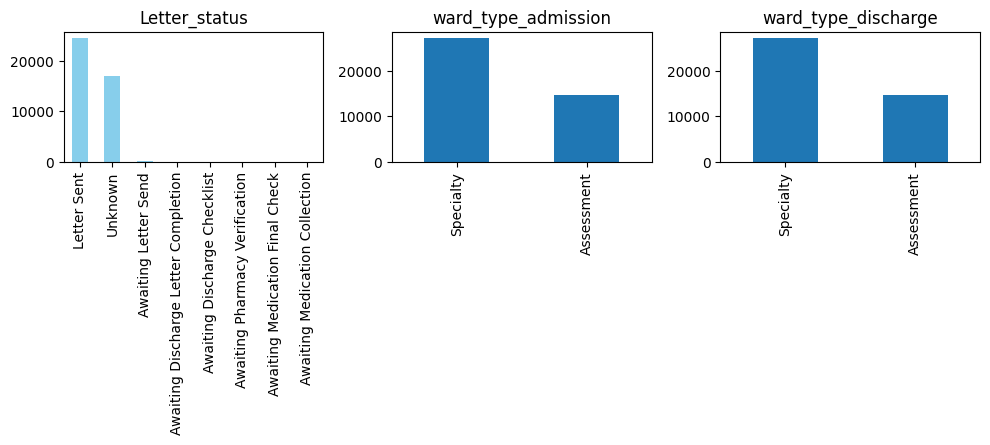

In [118]:
frequency = Full_df['discharge_letter_status'].value_counts()
ward_type_admissiond=Full_df['ward_type_admission'].value_counts()
ward_type_discharge=Full_df['ward_type_admission'].value_counts()

plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
frequency.plot(kind='bar', color='skyblue')
plt.title('Letter_status')
plt.xticks(rotation=90)
plt.xlabel('')
plt.subplot(2,3,2)
ward_type_admissiond.plot(kind='bar')
plt.title('ward_type_admission')
plt.xlabel('')
plt.subplot(2,3,3)
ward_type_discharge.plot(kind='bar')
plt.title('ward_type_discharge')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [119]:
Full_df=Full_df.copy()

# **__________________________________________________________________________**

# Take a summary of selected columns relevant to my part.

In [121]:
Full_df[['elective_admission_flag',     ##  These coulmns that I will have to select as part of my work
 'non_elective_admission_flag',
 'emergency_readmission_non_pbr_30',
 'readmission_flag_28_days_emergancy',
 'readmission_flag_30_days_emergancy',
 'general_medical_practice_desc',
 'IP_admission',
 'IP_discharge',
 'ward_type_admission',
 'ward_type_discharge',
 'spell_primary_diagnosis_description',
 'spell_dominant_proc_description',
 'dementia_diagnosis_flag',
 'discharge_letter_status',
 'covid19_diagnosis_flag',
 'comorbidity_score',
 'discharge_created_datetime_dt',
 'comorbidity_acute_myocardial_infarction_flag',
 'spell_length_of_stay_hours']].describe()

,elective_admission_flag,non_elective_admission_flag,emergency_readmission_non_pbr_30,readmission_flag_28_days_emergancy,readmission_flag_30_days_emergancy,IP_admission,IP_discharge,dementia_diagnosis_flag,comorbidity_score,comorbidity_acute_myocardial_infarction_flag,spell_length_of_stay_hours
count,41846.000000,41846.000000,41846.000000,41846.000000,41846.000000,41846.000000,41846.000000,41846.000000,41846.000000,41846.000000,41846.000000
mean,0.072480,0.468097,0.091669,0.101587,0.103929,0.541103,0.528581,0.001936,4.245424,0.046910,49.672466
std,0.259284,0.498987,0.288562,0.302108,0.305172,0.498314,0.499188,0.043954,7.854802,0.211449,135.309950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,34.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,1.000000,3022.000000


# **__________________________________________________________________________**

# To inspect **covid19_diagnosis_flag**

In [122]:
Full_df['covid19_diagnosis_flag'].value_counts()

,count
covid19_diagnosis_flag,
0,41695
1.0,151




# **______________________________________________________________________**



# Categrogical coulmns relivant to my part
**'general_medical_practice_desc','ward_type_admission','ward_type_discharge','spell_primary_diagnosis_description','spell_dominant_proc_description','discharge_letter_status'**


In [123]:
Full_df[['general_medical_practice_desc','ward_type_admission','ward_type_discharge','spell_primary_diagnosis_description','spell_dominant_proc_description','discharge_letter_status']].head() # This columns in my

,general_medical_practice_desc,ward_type_admission,ward_type_discharge,spell_primary_diagnosis_description,spell_dominant_proc_description,discharge_letter_status
0,BROOKMILL MEDICAL CENTRE,Specialty,Specialty,Diverticular disease of large intestine withou...,Record not grouped,Unknown
1,THE HOLLIES FAMILY SURGERY,Specialty,Specialty,Infection and inflammatory reaction due to int...,ASPIRATION OF JOINT,Letter Sent
2,BRYN STREET SURGERY,Specialty,Specialty,Acute peritonitis,Record not grouped,Unknown
3,BRYN STREET SURGERY,Specialty,Specialty,Malignant neoplasm: Upper-outer quadrant of br...,RE-EXCISION OF BREAST MARGINS,Letter Sent
4,SAXENA L,Specialty,Specialty,Barrett oesophagus,FIBREOPTIC ENDOSCOPIC EXAMINATION OF UPPER GAS...,Unknown


# **_________________________________________________________________________**

# Some plot to know know about these features

# **discharge_letter_status , ward_type_admission, ward_type_discharge**

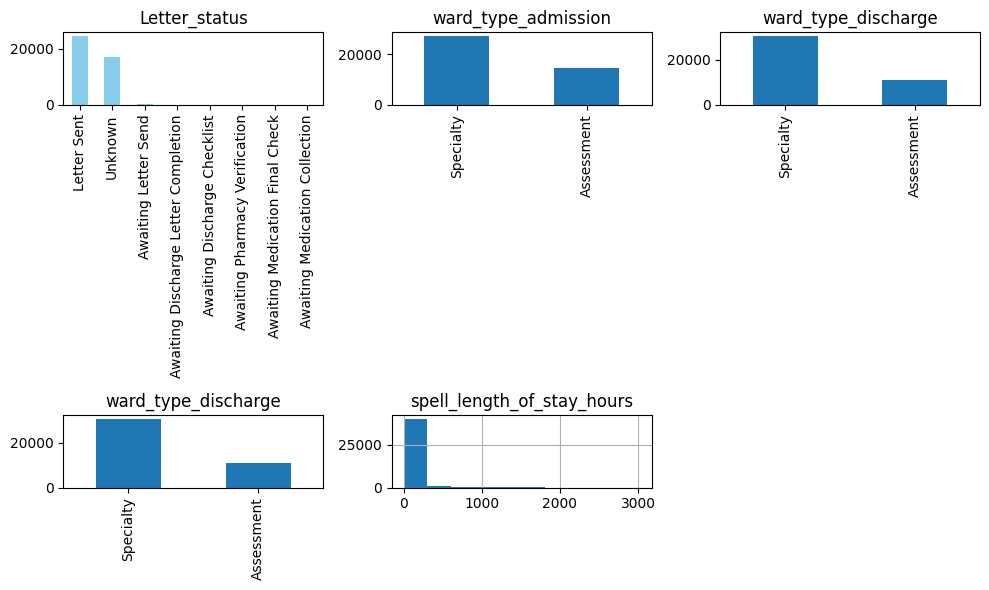

In [124]:
frequency = Full_df['discharge_letter_status'].value_counts()
ward_type_admissiond=Full_df['ward_type_admission'].value_counts()
ward_type_discharge=Full_df['ward_type_admission'].value_counts()
ward_type_discharge=Full_df['ward_type_discharge'].value_counts()

plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
frequency.plot(kind='bar', color='skyblue')
plt.title('Letter_status')
plt.xticks(rotation=90)
plt.xlabel('')
plt.subplot(2,3,2)
ward_type_admissiond.plot(kind='bar')
plt.title('ward_type_admission')
plt.xlabel('')
plt.subplot(2,3,3)
ward_type_discharge.plot(kind='bar')
plt.title('ward_type_discharge')
plt.xlabel('')
plt.subplot(2,3,4)
ward_type_discharge.plot(kind='bar')
plt.title('ward_type_discharge')
plt.xlabel('')
plt.subplot(2,3,5)
Full_df['spell_length_of_stay_hours'].hist()
plt.title('spell_length_of_stay_hours')
plt.tight_layout()
plt.show()

# **__________________________________________________________________________**


In [125]:

Full_df[['elective_admission_flag',
 'non_elective_admission_flag',
 'emergency_readmission_non_pbr_30',
 'readmission_flag_28_days_emergancy',
 'readmission_flag_30_days_emergancy',
 'general_medical_practice_desc',
 'IP_admission',
 'IP_discharge',
 'ward_type_admission',
 'ward_type_discharge',
 'spell_primary_diagnosis_description',
 'spell_dominant_proc_description',
 'dementia_diagnosis_flag',
 'discharge_letter_status',
 'covid19_diagnosis_flag',
 'comorbidity_score',
 'discharge_created_datetime_dt',
 'comorbidity_acute_myocardial_infarction_flag',
 'spell_length_of_stay_hours']].head()

,elective_admission_flag,non_elective_admission_flag,emergency_readmission_non_pbr_30,readmission_flag_28_days_emergancy,readmission_flag_30_days_emergancy,general_medical_practice_desc,IP_admission,IP_discharge,ward_type_admission,ward_type_discharge,spell_primary_diagnosis_description,spell_dominant_proc_description,dementia_diagnosis_flag,discharge_letter_status,covid19_diagnosis_flag,comorbidity_score,discharge_created_datetime_dt,comorbidity_acute_myocardial_infarction_flag,spell_length_of_stay_hours
0,0,0,0,0,0,BROOKMILL MEDICAL CENTRE,0,0,Specialty,Specialty,Diverticular disease of large intestine withou...,Record not grouped,0,Unknown,0,0,16/07/2023 08:30:00,0,3
1,0,0,0,0,0,THE HOLLIES FAMILY SURGERY,0,0,Specialty,Specialty,Infection and inflammatory reaction due to int...,ASPIRATION OF JOINT,0,Letter Sent,0,7,05/07/2023 10:08:00,0,2
2,0,1,1,1,1,BRYN STREET SURGERY,1,1,Specialty,Specialty,Acute peritonitis,Record not grouped,0,Unknown,0,0,08/06/2023 12:51:00,0,1
3,0,0,0,0,0,BRYN STREET SURGERY,0,0,Specialty,Specialty,Malignant neoplasm: Upper-outer quadrant of br...,RE-EXCISION OF BREAST MARGINS,0,Letter Sent,0,0,08/06/2023 17:35:00,0,10
4,0,0,0,0,0,SAXENA L,0,0,Specialty,Specialty,Barrett oesophagus,FIBREOPTIC ENDOSCOPIC EXAMINATION OF UPPER GAS...,0,Unknown,0,0,08/06/2023 15:35:00,0,7


# **_________________________________________________________________________**

# Applying CatBoostEncoder to those columns with respect to the target variables, in our case **spell_length_of_stay_hours**.
# and convert date because CatBoostEncoder only works with numeric

In [ ]:
# import catBoosterEncoder
from category_encoders.cat_boost import CatBoostEncoder

# Selelct columns that only I need to encoded

list_=['general_medical_practice_desc','ward_type_admission','ward_type_discharge','spell_primary_diagnosis_description',
      'spell_dominant_proc_description','discharge_letter_status'
]

if 'discharge_created_datetime_dt' in Full_df.columns: # CatBoostEncoder cannot deal with datetime or date
    Full_df['Discharge_time']=pd.to_datetime(Full_df['discharge_created_datetime_dt'],errors='coerce')
    Full_df['Discharge_time']=Full_df['Discharge_time'].astype(int)

Spll_hours='spell_length_of_stay_hours'

target_var=Full_df[Spll_hours].copy()
Features=Full_df.drop(columns=Spll_hours).copy()

cat_enc=CatBoostEncoder(cols=list_)# class initilization
cat_features=cat_enc.fit_transform(Features, target_var)

final_df=cat_features.copy(deep=True)

final_df[Spll_hours] = target_var


/tmp/ipython-input-4253989628.py:12: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Full_df['Discharge_time']=pd.to_datetime(Full_df['discharge_created_datetime_dt'],errors='coerce')


# **_____________________________________________________________________**



# These columns saved in dataframe called **final_df**



In [134]:
# Select the specific columns
final_df=final_df[['elective_admission_flag',
 'non_elective_admission_flag',
 'emergency_readmission_non_pbr_30',
 'readmission_flag_28_days_emergancy',
 'readmission_flag_30_days_emergancy',
 'general_medical_practice_desc',
 'IP_admission',
 'IP_discharge',
 'ward_type_admission',
 'ward_type_discharge',
 'spell_primary_diagnosis_description',
 'spell_dominant_proc_description',
 'dementia_diagnosis_flag',
 'discharge_letter_status',
 'covid19_diagnosis_flag',
 'comorbidity_score',
 'Discharge_time',
 'comorbidity_acute_myocardial_infarction_flag',
 'spell_length_of_stay_hours']]

# **_________________________________________________________________________**

# Checking the final dataframe, no null values.

In [132]:
final_df.isna().sum() # these columns are cleaned , no nulll vLUES

,0
elective_admission_flag,0
non_elective_admission_flag,0
emergency_readmission_non_pbr_30,0
readmission_flag_28_days_emergancy,0
readmission_flag_30_days_emergancy,0
general_medical_practice_desc,0
IP_admission,0
IP_discharge,0
ward_type_admission,0
ward_type_discharge,0


# Save it and download it

In [ ]:
# save the file as csv file to compined with other columns done by my colleagues
final_df.to_csv('../../data/processed/merge_Ali_col_40_60.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

https://learning.oreilly.com/library/view/feature-engineering-for/9781491953235/ch03.html#chap-basic-text